In [254]:
from pylab import *
import numpy as np
import os
from scipy import interpolate
from IPython import display
import models as wedge
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
import math as math
from astropy.io import ascii
from scipy.stats import binned_statistic_2d
from scipy.interpolate import interp1d

In [2]:
sigB = 5.670e-5 #erg/(cm^2 s K^4) 
Rsun = 69e9
Mearth = 5.972e27 #g
Msun = 1.989e+33 #g
Lsun_cgs = 3.839e33 #ergs/s
Rsun = 69e9 #cm
EarthtoSun = Mearth/Msun
G = 6.67e-8

## Class I Disk Data and Cleaning

In [709]:
ClassI_table = pd.read_csv('/Users/eduardo.aguirre_serrata/Downloads/Fiorellino_Table4 .csv)
ClassI_table.head()

,ID,A_v,Lacc,L_star,Teff,M_star,R_star,logMacc
0,1,18.61-15.95,0.14-0.10,1.36-1.40,3126-3487,0.22-0.35,4.00-3.05,-7.03%-7.49
1,2,29.21-28.02,0.71-0.61,4.87-4.97,3673-3958,0.47-0.68,5.35-4.43,-6.52%-6.83
2,3,23.15-21.94,0.23-0.20,4.64-4.67,3652-3935,0.45-0.65,5.31-4.42,-7.06%-7.36
3,5,15.69-13.61,0.49-0.39,1.19-1.29,3073-3467,0.21-0.34,3.75-3.04,-6.48%-6.90
4,6,9.93-7.71,0.09-0.07,1.11-1.13,3090-3407,0.21-0.32,3.72-2.96,-7.23%-7.63


In [1087]:
ClassI_table2 = pd.read_csv('/Users/eduardo.aguirre_serrata/Downloads/Fiorellino_Table4 .csv', sep='\t')
ClassI_table2.head()

,ID,Name,Cloud,Distance,L_bol,F_gam,M_dust,hello
0,01,CG2010 IRAS 032203035N,Per-IC348,219.8 +or- 16.2 ^a,${1.47}_{0.21}^{0.26}$,(4.25 +or- 1.34) x 10^-15,168 +or- 25,NaN
1,02,2MASS J033312843121241,Per-IC348,319.5 +or- 23.7 ^a,${{5.43}_{0.68}^{0.99}}^{\dagger }$,(5.69 +or- 7.06) x 10^-16,190 +or- 28,NaN
2,03,IRAS 035073801,Per-B1,310.9 +or- 22.8 ^a,${4.81}_{0.64}^{0.75}$,(2.92 +or- 3.45) x 10^-15,cdots,NaN
3,04*,NAMEIRA S041082803A,Tau-L1495,170.1 +or- 24.9 ^a,${{0.30}_{0.08}^{0.11}}^{\dagger }$,(5.14 +or- 1.91) x 10^-15,cdots,NaN
4,05,BHS98 MHO1,Tau-L1495,134.0 +or- 7.0 ^a,${1.69}_{0.16}^{0.14}$,(7.10 +or- 0.89) x 10^-14,171 +or- 18,NaN


In [967]:
#START from scratch here see if you can fix it

Mstar_ClassI_raw = ClassI_table.M_star
Rstar_ClassI_raw = ClassI_table.R_star
Lstar_ClassI_raw = ClassI_table.L_star
Teff_ClassI_raw = ClassI_table.Teff
Macc_ClassI_raw = ClassI_table.logMacc


Mstar_ClassI_zero = np.zeros_like(Mstar_ClassI_raw)
Rstar_ClassI_zero = np.zeros_like(Rstar_ClassI_raw)
Lstar_ClassI_zero = np.zeros_like(Lstar_ClassI_raw)
Teff_ClassI_zero = np.zeros_like(Teff_ClassI_raw)
Macc_ClassI_zero = np.zeros_like(Macc_ClassI_raw)



Mstar_ClassI_clean = []
Rstar_ClassI_clean = []
Lstar_ClassI_clean = []
Teff_ClassI_clean = []
Macc_ClassI_clean = []


for raw, zeros in zip(Mstar_ClassI_raw, Mstar_ClassI_zero):
    item1 = float(raw.split('-')[0])
    item2 = float(raw.split('-')[1])
    item_avg = np.array((item1+item2)/2)
    zeros = zeros + item_avg
    Mstar_ClassI_clean.append(zeros)


for raw, zeros in zip(Rstar_ClassI_raw, Rstar_ClassI_zero):
    item1 = float(raw.split('-')[0])
    item2 = float(raw.split('-')[1])
    item_avg = np.array((item1+item2)/2)
    zeros = zeros + item_avg
    Rstar_ClassI_clean.append(zeros)


for raw, zeros in zip(Lstar_ClassI_raw, Lstar_ClassI_zero):
    item1 = float(raw.split('-')[0])
    item2 = float(raw.split('-')[1])
    item_avg = np.array((item1+item2)/2)
    zeros = zeros + item_avg
    Lstar_ClassI_clean.append(zeros)


for raw, zeros in zip(Teff_ClassI_raw, Teff_ClassI_zero):
    item1 = float(raw.split('-')[0])
    item2 = float(raw.split('-')[1])
    item_avg = np.array((item1+item2)/2)
    zeros = zeros + item_avg
    Teff_ClassI_clean.append(zeros)

# for raw, zeros in zip(Mstar_ClassI_raw, Mstar_ClassI_zero):
#     item1 = float(raw.split('-')[0])
#     item2 = float(raw.split('-')[1])
#     item_avg = np.array((item1+item2)/2)
#     zeros = zeros + item_avg
#     Mstar_ClassI_clean.append(zeros)

# nbins=15
# plt.hist(Mstar_ClassI_clean, bins=nbins)

In [1133]:
Mdust_ClassI_raw_cdots = np.array(ClassI_table2.M_dust)
Mdust_ClassI_raw = np.delete(Mdust_ClassI_raw_cdots, np.where(Mdust_ClassI_raw_cdots == 'cdots'))


Mdust_ClassI_zero = np.zeros_like(Mdust_ClassI_raw)

Mdust_ClassI_clean_Mearth = []



for raw, zeros in zip(Mdust_ClassI_raw, Mdust_ClassI_zero):
    item1 = float(raw.split('+or-')[0])
    item2 = float(raw.split('+or-')[1])
    item_avg = np.array((item1+item2)/2)
    zeros = zeros + item_avg
    Mdust_ClassI_clean_Mearth.append(zeros)

Mdisk_ClassI_clean = np.log10(np.array(Mdust_ClassI_clean_Mearth)*EarthtoSun * 100.0)
10**np.mean(Mdisk_ClassI_clean)

0.012272646034972553

In [809]:
Macc_ClassI_raw = ClassI_table.logMacc
MACC1_c=[]
for i in range(len(Macc_ClassI_raw)):
    MACC1_c.append((Macc_ClassI_raw[i].split('%')))

MACC1_d= np.array(MACC1_c)
MACC1_item1 = MACC1_d[:,0]
MACC1_item2 = MACC1_d[:,1]
MACC1_float1 = MACC1_item1.astype(float)
MACC1_float2 = MACC1_item2.astype(float)



Macc_ClassI_clean = (MACC1_float1 + MACC1_float2)/2
Macc_ClassI_clean

# Macc_ClassI_raw_ = str(Macc_ClassI_raw.to_list())

#MACC1_c = Macc_ClassI_raw.split('%')
# np.array(MACC1_c)

# for raw, zeros in zip(Mstar_ClassI_raw, Mstar_ClassI_zero):
#     item1 = float(raw.split('-')[0])
#     item2 = float(raw.split('-')[1])
#     item_avg = np.array((item1+item2)/2)
#     zeros = zeros + item_avg
#     Mstar_ClassI_clean.append(zeros)

array([-7.26 , -6.675, -7.21 , -6.69 , -7.43 , -7.26 , -6.7  , -6.71 ,
       -6.365, -7.08 , -7.515, -5.86 , -7.36 , -6.67 , -5.785, -6.415,
       -6.96 , -6.685, -7.375, -6.44 , -5.99 , -7.295, -7.265, -6.65 ,
       -6.595, -7.915, -5.885, -7.04 , -7.445, -6.57 , -5.73 , -5.765,
       -6.125, -6.24 , -6.985, -5.895, -5.47 , -3.895, -6.61 ])

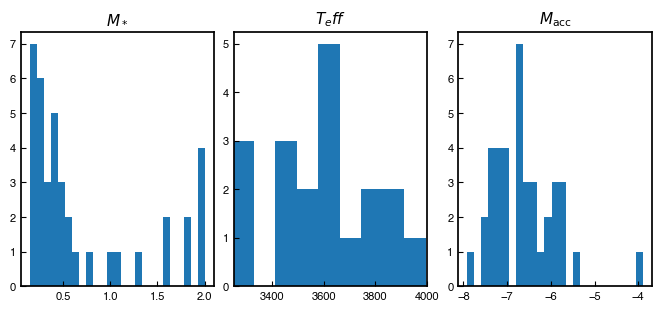

In [831]:
f,ax = plt.subplots(1,3, constrained_layout=True)
f.set_size_inches(6.5,3)

data_ClassI_1_toplot = [Mstar_ClassI_clean, Teff_ClassI_clean, Macc_ClassI_clean]


title_ClassI_1_toplot = [r"$M_*$", r"$T_eff$", r"$M_{\rm acc}$"]
for a,data,title in zip(ax,data_ClassI_1_toplot,title_ClassI_1_toplot):
    a.hist(data,bins=25)
    ax[1].set_xlim(3250, 4000)
    a.set_title(title)

(array([1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 3., 2., 7., 3.]),
 array([-3.54479138, -3.39495233, -3.24511329, -3.09527424, -2.9454352 ,
        -2.79559615, -2.64575711, -2.49591806, -2.34607902, -2.19623997,
        -2.04640093, -1.89656188, -1.74672284, -1.59688379, -1.44704475,
        -1.2972057 ]),
 <BarContainer object of 15 artists>)

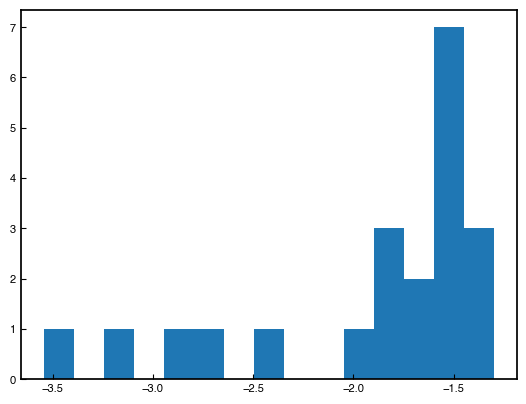

In [1131]:
plt.hist(Mdisk_ClassI_clean, bins=15)

In [1025]:
## CLASS I Rstar Calculator


Lstar_ClassI_cgs = np.array(np.array(Lstar_ClassI_clean)*Lsun_cgs)
def Rstar_ClassI(Tstar, Lstar):
    T4 = Tstar**4
    denom = np.array(4*math.pi*sigB*T4)
    Rstar_ClassI = (np.sqrt(Lstar/denom))/Rsun
    return Rstar_ClassI


# Ts_low = 3000.0
# Ts_reg = 3500.0
# Ts_high = 4000.0
# T_input = np.array([Ts_low, Ts_reg, Ts_high])
T_ClassI_input = Teff_ClassI_clean
L_ClassI_interp = interp1d(Teff_ClassI_clean, Lstar_ClassI_cgs, 'linear')
L_ClassI_new = np.array(L_ClassI_interp(T_ClassI_input))



# pp = L_ClassI_new[L_ClassI_new < 1e36]

Rs_ClassI_sample = Rstar_ClassI(np.array(T_ClassI_input), L_ClassI_new)
Rs_ClassI_sample
Rs_ClassI_sample = Rs_ClassI_sample[Rs_ClassI_sample < 50]
# hist(Rs_ClassI_sample, bins=15)
# Rs_low = Rs_sample[0]
# Rs_reg = Rs_sample[1]
# Rs_high = Rs_sample[2]

# Rs_sample = Rs_sample[Rs_sample < 10]   #ASK HOW TO CONDENSE INTO ONE LINE!
# Rs_sample_clean = Rs_sample[Rs_sample > 1.4]

# L_new_sun = np.array(L_new/Lsun_cgs)

In [1045]:
T_input_new = 4100
Rs_ClassI_interp = interp1d(Teff_pop, Rs_ClassI_sample, 'linear')
Rs_ClassI_new = np.array(Rs_ClassI_interp(T_input_new))
Rs_ClassI_new
# Rs_ClassI_sample_pp = Rs_ClassI_sample_pp[Rs_ClassI_sample_pp < 50]
# plt.plot(Teff_pop, Rs_ClassI_sample, '.')

array(5.44182082)

Text(0.5, 1.0, 'T vs R interp')

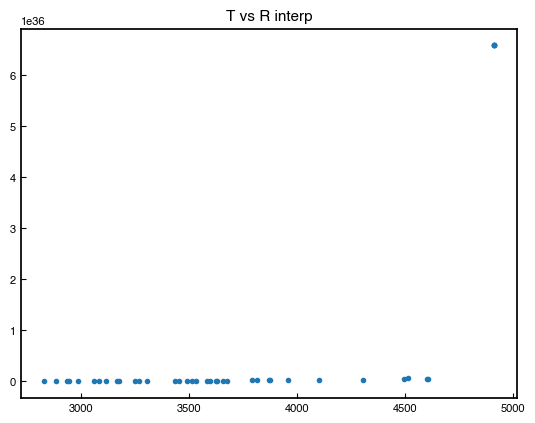

In [1047]:
L_ClassI_list = L_ClassI_new.tolist()
# L_ClassI_list.pop(37)
# L_ClassI_list.pop(36)
# L_ClassI_list.pop(35)
# L_ClassI_list.pop(33)


Teff_pop = Teff_ClassI_clean
# Teff_pop.pop(37)
# Teff_pop.pop(36)
# Teff_pop.pop(35)
# Teff_pop.pop(33)
# Teff_pop

plt.plot(Teff_pop, L_ClassI_list, '.')
plt.title('T vs R interp')

(array([1., 4., 2., 5., 1., 2., 4., 5., 1., 5., 3., 1., 0., 0., 1.]),
 array([2.2870546 , 2.6007715 , 2.9144884 , 3.22820531, 3.54192221,
        3.85563912, 4.16935602, 4.48307292, 4.79678983, 5.11050673,
        5.42422364, 5.73794054, 6.05165744, 6.36537435, 6.67909125,
        6.99280816]),
 <BarContainer object of 15 artists>)

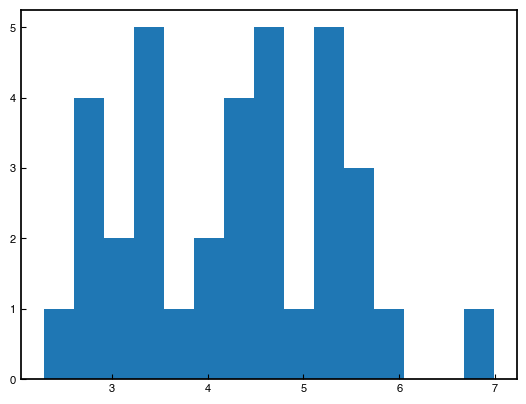

In [987]:
hist(Rs_ClassI_sample, bins=15)

## Class II Disk Data and Cleaning

In [4]:
## DisK II Data

ptable = pd.read_csv('/Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/DiskLibrary/PP7-Surveys_2022-10-19_PPVII_website.csv')
ptable.head()

,Region,Source,2MASS/SSTc2d,RA,Dec,EDR3_plx,EDR3_err_plx,EDR3_dist_pc,EDR3_RUWE,EDR3_Dist_PPVII,...,Mstar_B15_xs_DR3,logMacc_B15_xs_DR3,Mstar_S00_xs_DR3,logMacc_S00_xs_DR3,Mstar_Fei_xs_DR3,logMacc_Fei_xs_DR3,Mstar_PPVII,logMacc_PPVII,notes_Macc_PPVII,dist_PPVII
0,Lupus,Sz65,J15392776-3446171,39:27.8,-34:46:17.577,6.5159,0.0253,153.47,1.417,153.47,...,0.661,-9.516,0.7250,-9.556,0.61,-9.48,0.610,-9.480,<,153.47
1,Lupus,Sz66,J15392828-3446180,39:28.3,-34:46:18.450,6.4134,0.0269,155.92,1.2,155.92,...,0.291,-8.508,0.3125,-8.538,0.31,-8.54,0.291,-8.508,--,155.92
2,Lupus,J15430131-3409153,J15430131-3409153,43:01.3,-34:09:15.400,--,--,--,--,158.00,...,-99.000,--,-99.0000,--,-99.00,-99.00,-99.000,-99.000,--,-99.00
3,Lupus,J15430227-3444059,J15430227-3444059,43:02.3,-34:44:06.200,-0.0997,0.2261,-10030.09,1.018,158.00,...,-99.000,--,-99.0000,--,-99.00,-99.00,-99.000,-99.000,--,-99.00
4,Lupus,J15445789-3423392,J15445789-3423392,44:57.9,-34:23:39.500,6.4956,0.0772,153.95,1.201,153.95,...,0.087,-10.68,0.1000,-10.74,0.09,-10.70,0.087,-10.680,--,153.95


In [10]:
Mstar_ = np.array(ptable.Mstar_PPVII)
Lstar_ = ptable.Lstar_xs_DR3 #erg/s
Teff_ = ptable.Teff_HH14
Mstar_diskII = np.array(ptable[ptable['Disk'] == 'II']['Mstar_PPVII'])
Mdisk_diskII = np.array(ptable[ptable['Disk'] == 'II']['Standardized_Mdust_Mearth'])


Mstar_clean = []
Lstar_clean = []
Teff_clean = []
Mstar_diskII_clean = []


data_raw = [Mstar_, Mstar_diskII,Lstar_,Teff_]
data_clean = [Mstar_clean, Mstar_diskII_clean,Lstar_clean, Teff_clean]


for raw, clean in zip(data_raw, data_clean):
    for item in raw:
        if str(item).startswith('<'):   #quite a few of the dust values have a "<" so we must get rid of it to turn our values into floats
            item = str(item).strip('<')
        try:
            flitem = float(item)
        except:
            flitem = -99
        clean.append(flitem)
    for index,item in enumerate(clean):
        if np.isnan(item):
            clean[index] = -99

In [12]:
Mstar_series = pd.Series(data=Mstar_clean, index=Mstar_clean)
Mstar_clean_clean = np.array(Mstar_series.drop(labels=-99))

Lstar_series = pd.Series(data=Lstar_clean, index=Lstar_clean)
Lstar_clean_clean = np.array(Lstar_series.drop(labels=-99))

Teff_series = pd.Series(data=Teff_clean, index=Teff_clean)
Teff_clean_clean = np.array(Teff_series.drop(labels=-99))

print(np.shape(Lstar_clean_clean), np.shape(Teff_clean_clean))

(550,) (550,)


In [414]:
## Rstar calc

Lstar_cgs = np.array(Lstar_clean_clean*Lsun_cgs)
def Rstar_(Tstar, Lstar):
    T4 = Tstar**4
    denom = np.array(4*math.pi*sigB*T4)
    Rstar_ = (np.sqrt(Lstar/denom))/Rsun
    return Rstar_
Ts_low = 3000.0
Ts_reg = 3500.0
Ts_high = 4000.0
T_input = np.array([Ts_low, Ts_reg, Ts_high])
# T_input = Teff_clean_clean
L_interp = interp1d(np.unique(Teff_clean_clean), Lstar_cgs, 'linear')
L_new = np.array(L_interp(T_input))
Rs_sample = Rstar_(T_input, L_new)
Rs_low = Rs_sample[0]
Rs_reg = Rs_sample[1]
Rs_high = Rs_sample[2]

Rs_sample = Rs_sample[Rs_sample < 10]   #ASK HOW TO CONDENSE INTO ONE LINE!
Rs_sample_clean = Rs_sample[Rs_sample > 1.4]

L_new_sun = np.array(L_new/Lsun_cgs)

print('Rs_low=',Rs_low, '   Rs_reg=',Rs_reg, '   Rs_high=',Rs_high)
print('Ls_low=',L_new_sun[0], '   Ls_reg=',L_new_sun[1], '   Ls_high=',L_new_sun[2])

# plt.plot(Teff_clean_clean,L_new, '.')
# plt.ylim(0,0.2e35)

Rs_low= 4.08702816168645    Rs_reg= 1.0816040689952864    Rs_high= 4.674909456791097
Ls_low= 1.1955652173913045    Ls_reg= 0.155125    Ls_high= 4.943782608695653


In [480]:
# L_interp = interp1d(np.unique(Teff_clean_clean), Lstar_cgs, 'linear')
# L_new = np.array(L_interp(T_input))
# Rs_sample = Rstar_(T_input, L_new)

np.shape(np.unique(Lstar_cgs))
# plt.plot(Teff_clean_clean, Lstar_cgs, '.')
# plt.plot(np.unique(Teff_clean_clean),L_interp(np.unique(Teff_clean_clean)))
# print(np.min(np.unique(Teff_clean_clean)))
# plt.ylim(0,0.2e35)

(389,)

## Radmc3d and Model Initialization


### Temp

In [97]:
##STARTING MODEL WITH CORRECT TEMP, Rstar, Lstar
fid_Teff_reg_out = 'out/fid_Teff_Reg/'
fid_Teff_reg_params = wedge.new_model('classII_disk_fid')
fid_Teff_reg_params['Ts'] = Ts_reg
fid_Teff_reg_params['Rs'] = Rs_reg
fid_Teff_reg_m = wedge.initialize_model(fid_Teff_reg_params, fid_Teff_reg_out)

fid_Teff_low_out = 'out/fid_Teff_Low/'
fid_Teff_low_params = wedge.new_model('classII_disk_fid')
fid_Teff_low_params['Ts'] = Ts_low
fid_Teff_low_params['Rs'] = Rs_low
fid_Teff_low_m = wedge.initialize_model(fid_Teff_low_params, fid_Teff_low_out)

fid_Teff_high_out = 'out/fid_Teff_High/'
fid_Teff_high_params = wedge.new_model('classII_disk_fid')
fid_Teff_high_params['Ts'] = Ts_high
fid_Teff_high_params['Rs'] = Rs_high
fid_Teff_high_m = wedge.initialize_model(fid_Teff_high_params, fid_Teff_high_out)

directory exists - will overwrite current model if you write to it!
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Reg/wavelength_micron.inp
Assigned model directory:/Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Reg/
directory exists - will overwrite current model if you write to it!
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Low/wavelength_micron.inp
Assigned model directory:/Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Low/
directory exists - will overwrite current model if you write to it!
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_High/wavelength_micron.inp
Assigned model directory:/Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_High/


In [99]:
fid_Teff_low_m.m.print_params()

{'Ms': 0.6,
 'Rs': 4.08702816168645,
 'Ts': 3000.0,
 'accrate': 1e-08,
 'f': 0.01,
 'xmodel': None,
 'Mdisk': 0.004,
 'Mfrac': [0.005, 0.005],
 'R0': [1, 1],
 'H0': [1, 0.2],
 'p': [-1, -1],
 'Rdisk': [60, 60],
 'Tfac': 1,
 'q': 0.5,
 'hydro': [None, None, None],
 'Min': 0,
 'Rc': 90,
 'rho_amb': 1e-25,
 'rho_0': 3e-22,
 'theta_min': 25,
 'exf': 0.25,
 'Rmax': 15000.0,
 'd2g': 0.01,
 'shock': False,
 'nstreams': 1,
 'stream_frac': 1,
 'N': [180, 90, 48],
 'min': [0.1, 0.19634954084936207, 0],
 'max': [400, 1.5707963267948966, 6.283185307179586],
 'spacing': ['log', 'lin', 'lin'],
 'rho_si': 3.1518,
 'amin_chem': 0.06,
 'amax_ism': 1.0,
 'amin': [0.005, 0.005],
 'amax': [1, 1000.0],
 'apow': [3.5, 3.5],
 'cr_model': 'ssx',
 'zetacr': 1.3e-17,
 'G0': 1,
 'viscous_heating': False,
 'fLya': 0.0001,
 'xray': True}

In [70]:
wedge.write_opacities(fid_Teff_reg_m.m,ndust=2,update=False)
wedge.write_opacities(fid_Teff_low_m.m,ndust=2,update=False)
wedge.write_opacities(fid_Teff_high_m.m,ndust=2,update=False)

Running optool to generate new opacities


....................
....................
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Reg/dustkappa_dust-1.inp
....................
.......

Running optool to generate new opacities


.............
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Reg/dustkappa_dust-2.inp
....................
..............

updating dustopac.inp
updating dustopac.inp
Running optool to generate new opacities


......
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_High/dustkappa_dust-1.inp
....................
.......

Running optool to generate new opacities


............

updating dustopac.inp


.
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_High/dustkappa_dust-2.inp


In [72]:
wedge.prep_thermal_transfer(fid_Teff_reg_m)
wedge.prep_thermal_transfer(fid_Teff_low_m)
wedge.prep_thermal_transfer(fid_Teff_high_m)

Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Reg/wavelength_micron.inp
Writing /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Reg/wavelength_micron.inp
Writing stars.inp
writing dust_density.inp
writing external_source.inp
updating radmc3d.inp
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Low/wavelength_micron.inp
Writing /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Low/wavelength_micron.inp
Writing stars.inp
writing external_source.inp
updating radmc3d.inp
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_High/wavelength_micron.inp
Writing /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_High/wavelength_micron.inp
Writing stars.inp
writing dust_density.inp
writing external_source.inp
updating radmc3d.inp


0

In [74]:
wedge.do_thermal_transfer(fid_Teff_reg_m)
wedge.do_thermal_transfer(fid_Teff_low_m)
wedge.do_thermal_transfer(fid_Teff_high_m)

  
      WELCOME TO RADMC-3D: A 3-D CONTINUUM AND LINE RT SOLVER    
                                                                 
                          VERSION 2.0                            
                                                                 
                (c) 2008-2023 Cornelis Dullemond                 
                                                                 
       Please feel free to ask questions. Also please report     
        bugs and/or suspicious behavior without hestitation.     
      The reliability of this code depends on your vigilance!    
                    dullemond@uni-heidelberg.de                  
                                                                 
   To keep up-to-date with bug-alarms and bugfixes, follow the   
                     RADMC-3D code on github                     
             https://github.com/dullemond/radmc3d-2.0            
                                                                 
       

In [76]:
fid_Teff_reg_m.read_rho()
fid_Teff_reg_m.read_Tdust()
print('Temperature data is stored in Teff_reg.T with keys: ', fid_Teff_reg_m.T.keys())
print('Density data is stored in Teff_reg.rho with keys:', fid_Teff_reg_m.rho.keys())

fid_Teff_low_m.read_rho()
fid_Teff_low_m.read_Tdust()
print('Temperature data is stored in Teff_low.T with keys: ', fid_Teff_low_m.T.keys())
print('Density data is stored in Teff_low.rho with keys:', fid_Teff_low_m.rho.keys())

fid_Teff_high_m.read_rho()
fid_Teff_high_m.read_Tdust()
print('Temperature data is stored in Teff_high.T with keys: ', fid_Teff_high_m.T.keys())
print('Density data is stored in Teff_high.rho with keys:', fid_Teff_high_m.rho.keys())

Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Reg/dust_density.inp
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Reg/dust_temperature.dat
Temperature data is stored in Teff_reg.T with keys:  dict_keys(['dust'])
Density data is stored in Teff_reg.rho with keys: dict_keys(['dust1', 'dust2', 'gas'])
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Low/dust_density.inp
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_Low/dust_temperature.dat
Temperature data is stored in Teff_low.T with keys:  dict_keys(['dust'])
Density data is stored in Teff_low.rho with keys: dict_keys(['dust1', 'dust2', 'gas'])
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_High/dust_density.inp
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Teff_High/dust_temperature.dat
Temperature data is stored in Teff_high.T with keys:  dict_keys(['

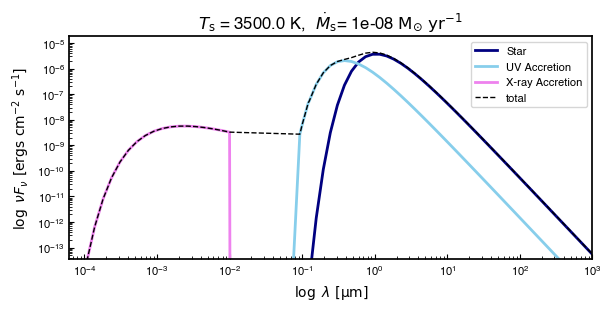

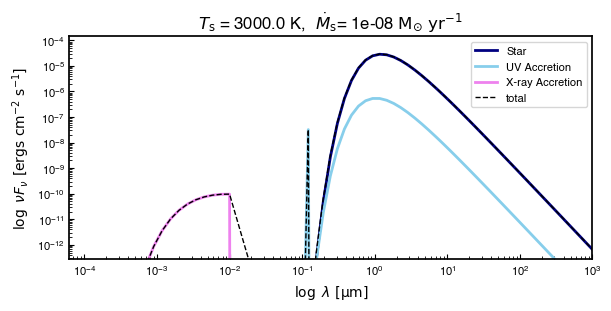

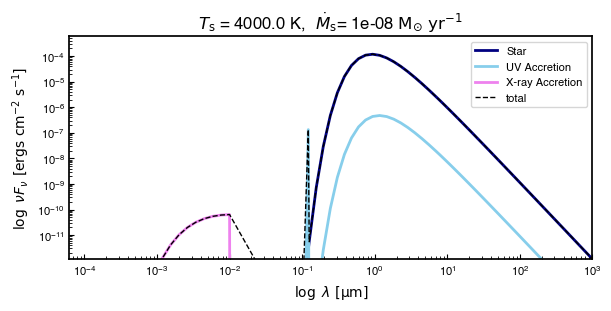

In [78]:
wedge.plot_flux_components(fid_Teff_reg_m)
wedge.plot_flux_components(fid_Teff_low_m)
wedge.plot_flux_components(fid_Teff_high_m)

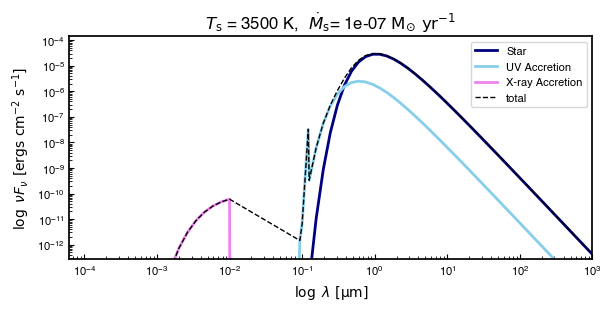

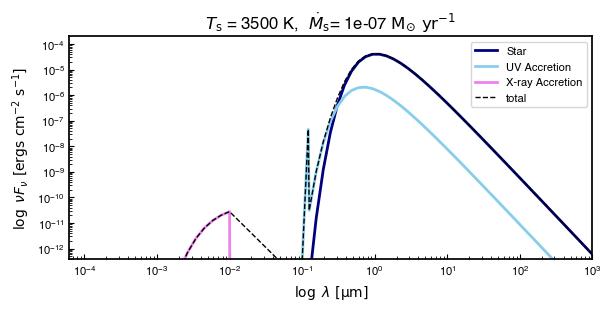

In [125]:
wedge.plot_flux_components(fid_T1_Macc1_m)
wedge.plot_flux_components(fid_TLR_m)

In [82]:
#Temperature Components
fid_Teff_reg_Tcomponents = np.array(fid_Teff_reg_m.T['dust'])
fid_Teff_low_Tcomponents = np.array(fid_Teff_low_m.T['dust'])
fid_Teff_high_Tcomponents = np.array(fid_Teff_high_m.T['dust'])

#Gas components
fid_Teff_reg_rho_gas_components = np.array(fid_Teff_reg_m.rho['gas'])
fid_Teff_low_rho_gas_components = np.array(fid_Teff_low_m.rho['gas'])
fid_Teff_high_rho_gas_components = np.array(fid_Teff_high_m.rho['gas'])

### Mstar 

In [152]:
### Making it a for loop to make it easier

# fid_Ms_out = [fid_Ms_reg_out, fid_Ms_low_out, fid_Ms_high_out]
# Ms_ = [0.45, 0.6, 0.75]

# for Ms_param, fid_out in zip(fid_Ms_out, Ms_):
#     fid_param_out = fid_out
#     fid_param_params['Ms'] = Ms_param
#     fid_param_m = wedge.intialize_model(fid_param_params, fid_param_out)


In [204]:
Ms_ = [0.4, 0.6, 0.8]

fid_Ms_reg_out = 'out/fid_Ms_Reg/'
fid_Ms_reg_params = wedge.new_model('classII_disk_fid')
fid_Ms_reg_params['Ms'] = Ms_[1]
fid_Ms_reg_m = wedge.initialize_model(fid_Ms_reg_params, fid_Ms_reg_out)

fid_Ms_low_out = 'out/fid_Ms_Low/'
fid_Ms_low_params = wedge.new_model('classII_disk_fid')
fid_Ms_low_params['Ms'] = Ms_[0]
fid_Ms_low_m = wedge.initialize_model(fid_Ms_low_params, fid_Ms_low_out)

fid_Ms_high_out = 'out/fid_Ms_High/'
fid_Ms_high_params = wedge.new_model('classII_disk_fid')
fid_Ms_high_params['Ms'] = Ms_[2]
fid_Ms_high_m = wedge.initialize_model(fid_Ms_high_params, fid_Ms_high_out)

directory exists - will overwrite current model if you write to it!
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Reg/wavelength_micron.inp
Assigned model directory:/Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Reg/
directory exists - will overwrite current model if you write to it!
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Low/wavelength_micron.inp
Assigned model directory:/Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Low/
directory exists - will overwrite current model if you write to it!
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_High/wavelength_micron.inp
Assigned model directory:/Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_High/


In [210]:
fid_Ms_reg_m.m.print_params()

{'Ms': 0.6,
 'Rs': 1.2,
 'Ts': 3500,
 'accrate': 1e-08,
 'f': 0.01,
 'xmodel': None,
 'Mdisk': 0.004,
 'Mfrac': [0.005, 0.005],
 'R0': [1, 1],
 'H0': [1, 0.2],
 'p': [-1, -1],
 'Rdisk': [60, 60],
 'Tfac': 1,
 'q': 0.5,
 'hydro': [None, None, None],
 'Min': 0,
 'Rc': 90,
 'rho_amb': 1e-25,
 'rho_0': 3e-22,
 'theta_min': 25,
 'exf': 0.25,
 'Rmax': 15000.0,
 'd2g': 0.01,
 'shock': False,
 'nstreams': 1,
 'stream_frac': 1,
 'N': [180, 90, 48],
 'min': [0.1, 0.19634954084936207, 0],
 'max': [400, 1.5707963267948966, 6.283185307179586],
 'spacing': ['log', 'lin', 'lin'],
 'rho_si': 3.1518,
 'amin_chem': 0.06,
 'amax_ism': 1.0,
 'amin': [0.005, 0.005],
 'amax': [1, 1000.0],
 'apow': [3.5, 3.5],
 'cr_model': 'ssx',
 'zetacr': 1.3e-17,
 'G0': 1,
 'viscous_heating': False,
 'fLya': 0.0001,
 'xray': True}

In [213]:
wedge.write_opacities(fid_Ms_reg_m.m,ndust=2,update=False)
wedge.write_opacities(fid_Ms_low_m.m,ndust=2,update=False)
wedge.write_opacities(fid_Ms_high_m.m,ndust=2,update=False)

Running optool to generate new opacities


....................
....................
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Reg/dustkappa_dust-1.inp
....................
.......

Running optool to generate new opacities


.............
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Reg/dustkappa_dust-2.inp
....................
..............

updating dustopac.inp
Running optool to generate new opacities


......
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Low/dustkappa_dust-1.inp
....................
.......

Running optool to generate new opacities


.............
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Low/dustkappa_dust-2.inp
....................
..............

updating dustopac.inp
Running optool to generate new opacities


......
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_High/dustkappa_dust-1.inp
....................
.......

Running optool to generate new opacities


............

updating dustopac.inp


.
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_High/dustkappa_dust-2.inp


In [215]:
wedge.prep_thermal_transfer(fid_Ms_reg_m)
wedge.prep_thermal_transfer(fid_Ms_low_m)
wedge.prep_thermal_transfer(fid_Ms_high_m)

Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Reg/wavelength_micron.inp
Writing /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Reg/wavelength_micron.inp
Writing stars.inp
writing dust_density.inp
writing external_source.inp
updating radmc3d.inp
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Low/wavelength_micron.inp
Writing /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Low/wavelength_micron.inp
Writing stars.inp
writing dust_density.inp
writing external_source.inp
updating radmc3d.inp
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_High/wavelength_micron.inp
Writing /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_High/wavelength_micron.inp
Writing stars.inp
writing dust_density.inp
writing external_source.inp
updating radmc3d.inp


0

In [217]:
wedge.do_thermal_transfer(fid_Ms_reg_m)
wedge.do_thermal_transfer(fid_Ms_low_m)
wedge.do_thermal_transfer(fid_Ms_high_m)

  
      WELCOME TO RADMC-3D: A 3-D CONTINUUM AND LINE RT SOLVER    
                                                                 
                          VERSION 2.0                            
                                                                 
                (c) 2008-2023 Cornelis Dullemond                 
                                                                 
       Please feel free to ask questions. Also please report     
        bugs and/or suspicious behavior without hestitation.     
      The reliability of this code depends on your vigilance!    
                    dullemond@uni-heidelberg.de                  
                                                                 
   To keep up-to-date with bug-alarms and bugfixes, follow the   
                     RADMC-3D code on github                     
             https://github.com/dullemond/radmc3d-2.0            
                                                                 
       

In [219]:
fid_Ms_reg_m.read_rho()
fid_Ms_reg_m.read_Tdust()
print('Temperature data is stored in Ms_reg.T with keys: ', fid_Ms_reg_m.T.keys())
print('Density data is stored in Ms_reg.rho with keys:', fid_Ms_reg_m.rho.keys())

fid_Ms_low_m.read_rho()
fid_Ms_low_m.read_Tdust()
print('Temperature data is stored in Ms_low.T with keys: ', fid_Ms_low_m.T.keys())
print('Density data is stored in Ms_low.rho with keys:', fid_Ms_low_m.rho.keys())

fid_Ms_high_m.read_rho()
fid_Ms_high_m.read_Tdust()
print('Temperature data is stored in Ms_high.T with keys: ', fid_Ms_high_m.T.keys())
print('Density data is stored in Ms_high.rho with keys:', fid_Ms_high_m.rho.keys())

Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Reg/dust_density.inp
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Reg/dust_temperature.dat
Temperature data is stored in Ms_reg.T with keys:  dict_keys(['dust'])
Density data is stored in Ms_reg.rho with keys: dict_keys(['dust1', 'dust2', 'gas'])
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Low/dust_density.inp
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_Low/dust_temperature.dat
Temperature data is stored in Ms_low.T with keys:  dict_keys(['dust'])
Density data is stored in Ms_low.rho with keys: dict_keys(['dust1', 'dust2', 'gas'])
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_High/dust_density.inp
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Ms_High/dust_temperature.dat
Temperature data is stored in Ms_high.T with keys:  dict_keys(['dust'])
Density data i

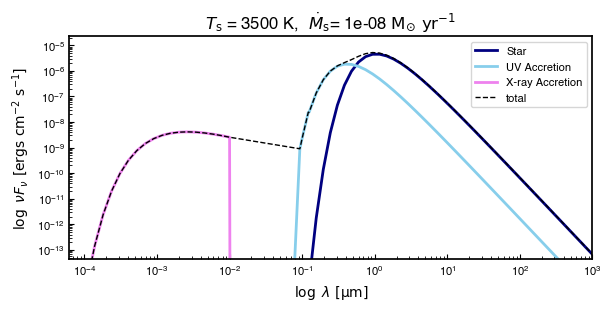

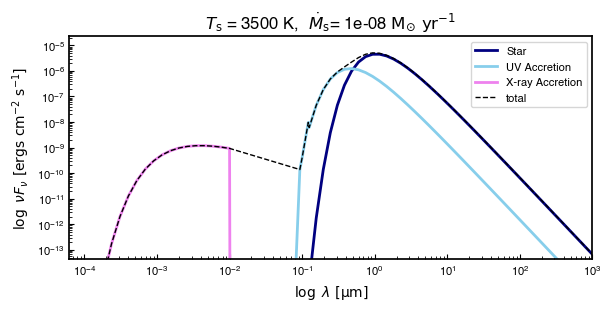

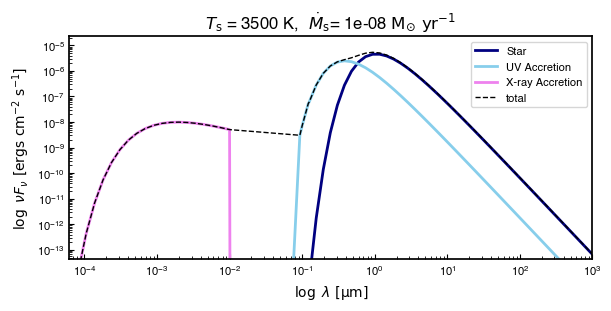

In [221]:
wedge.plot_flux_components(fid_Ms_reg_m)
wedge.plot_flux_components(fid_Ms_low_m)
wedge.plot_flux_components(fid_Ms_high_m)

In [223]:
#Temperature Components
fid_Ms_reg_Tcomponents = np.array(fid_Ms_reg_m.T['dust'])
fid_Ms_low_Tcomponents = np.array(fid_Ms_low_m.T['dust'])
fid_Ms_high_Tcomponents = np.array(fid_Ms_high_m.T['dust'])

#Gas components
fid_Ms_reg_rho_gas_components = np.array(fid_Ms_reg_m.rho['gas'])
fid_Ms_low_rho_gas_components = np.array(fid_Ms_low_m.rho['gas'])
fid_Ms_high_rho_gas_components = np.array(fid_Ms_high_m.rho['gas'])

### Macc

In [432]:
Macc_ = [5e-9, 1e-8, 5e-7]

fid_Macc_reg_out = 'out/fid_Macc_Reg/'
fid_Macc_reg_params = wedge.new_model('classII_disk_fid')
fid_Macc_reg_params['accrate'] = Macc_[1]
fid_Macc_reg_m = wedge.initialize_model(fid_Macc_reg_params, fid_Macc_reg_out)

fid_Macc_low_out = 'out/fid_Macc_Low/'
fid_Macc_low_params = wedge.new_model('classII_disk_fid')
fid_Macc_low_params['accrate'] = Macc_[0]
fid_Macc_low_m = wedge.initialize_model(fid_Macc_low_params, fid_Macc_low_out)

fid_Macc_high_out = 'out/fid_Macc_High/'
fid_Macc_high_params = wedge.new_model('classII_disk_fid')
fid_Macc_high_params['accrate'] = Macc_[2]
fid_Macc_high_m = wedge.initialize_model(fid_Macc_high_params, fid_Macc_high_out)

directory exists - will overwrite current model if you write to it!
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_Reg/wavelength_micron.inp
Assigned model directory:/Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_Reg/
directory exists - will overwrite current model if you write to it!
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_Low/wavelength_micron.inp
Assigned model directory:/Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_Low/
directory exists - will overwrite current model if you write to it!
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_High/wavelength_micron.inp
Assigned model directory:/Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_High/


In [175]:
fid_Macc_reg_m.m.print_params()

{'Ms': 0.6,
 'Rs': 1.2,
 'Ts': 3500,
 'accrate': 1e-08,
 'f': 0.01,
 'xmodel': None,
 'Mdisk': 0.004,
 'Mfrac': [0.005, 0.005],
 'R0': [1, 1],
 'H0': [1, 0.2],
 'p': [-1, -1],
 'Rdisk': [60, 60],
 'Tfac': 1,
 'q': 0.5,
 'hydro': [None, None, None],
 'Min': 0,
 'Rc': 90,
 'rho_amb': 1e-25,
 'rho_0': 3e-22,
 'theta_min': 25,
 'exf': 0.25,
 'Rmax': 15000.0,
 'd2g': 0.01,
 'shock': False,
 'nstreams': 1,
 'stream_frac': 1,
 'N': [180, 90, 48],
 'min': [0.1, 0.19634954084936207, 0],
 'max': [400, 1.5707963267948966, 6.283185307179586],
 'spacing': ['log', 'lin', 'lin'],
 'rho_si': 3.1518,
 'amin_chem': 0.06,
 'amax_ism': 1.0,
 'amin': [0.005, 0.005],
 'amax': [1, 1000.0],
 'apow': [3.5, 3.5],
 'cr_model': 'ssx',
 'zetacr': 1.3e-17,
 'G0': 1,
 'viscous_heating': False,
 'fLya': 0.0001,
 'xray': True}

In [179]:
wedge.write_opacities(fid_Macc_reg_m.m,ndust=2,update=False)
wedge.write_opacities(fid_Macc_low_m.m,ndust=2,update=False)
wedge.write_opacities(fid_Macc_high_m.m,ndust=2,update=False)

Running optool to generate new opacities


....................
....................
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_Reg/dustkappa_dust-1.inp
....................
.......

Running optool to generate new opacities


.............
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_Reg/dustkappa_dust-2.inp
....................
..............

updating dustopac.inp
Running optool to generate new opacities


......
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_Low/dustkappa_dust-1.inp
....................
.......

Running optool to generate new opacities


.............
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_Low/dustkappa_dust-2.inp
....................
..............

updating dustopac.inp
Running optool to generate new opacities


......
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_High/dustkappa_dust-1.inp
....................
.......

Running optool to generate new opacities


............

updating dustopac.inp


.
Writing dust opacity output to file:  /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_High/dustkappa_dust-2.inp


In [434]:
# wedge.prep_thermal_transfer(fid_Macc_reg_m)
# wedge.prep_thermal_transfer(fid_Macc_low_m)
wedge.prep_thermal_transfer(fid_Macc_high_m)

Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_High/wavelength_micron.inp
Writing /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_High/wavelength_micron.inp
Writing stars.inp
updating radmc3d.inp


0

In [436]:
# wedge.do_thermal_transfer(fid_Macc_reg_m)
# wedge.do_thermal_transfer(fid_Macc_low_m)
wedge.do_thermal_transfer(fid_Macc_high_m)

  
      WELCOME TO RADMC-3D: A 3-D CONTINUUM AND LINE RT SOLVER    
                                                                 
                          VERSION 2.0                            
                                                                 
                (c) 2008-2023 Cornelis Dullemond                 
                                                                 
       Please feel free to ask questions. Also please report     
        bugs and/or suspicious behavior without hestitation.     
      The reliability of this code depends on your vigilance!    
                    dullemond@uni-heidelberg.de                  
                                                                 
   To keep up-to-date with bug-alarms and bugfixes, follow the   
                     RADMC-3D code on github                     
             https://github.com/dullemond/radmc3d-2.0            
                                                                 
       

In [438]:
fid_Macc_reg_m.read_rho()
fid_Macc_reg_m.read_Tdust()
print('Temperature data is stored in Macc_reg.T with keys: ', fid_Macc_reg_m.T.keys())
print('Density data is stored in Macc_reg.rho with keys:', fid_Macc_reg_m.rho.keys())

fid_Macc_low_m.read_rho()
fid_Macc_low_m.read_Tdust()
print('Temperature data is stored in Macc_low.T with keys: ', fid_Macc_low_m.T.keys())
print('Density data is stored in Macc_low.rho with keys:', fid_Macc_low_m.rho.keys())

fid_Macc_high_m.read_rho()
fid_Macc_high_m.read_Tdust()
print('Temperature data is stored in Macc_high.T with keys: ', fid_Macc_high_m.T.keys())
print('Density data is stored in Macc_high.rho with keys:', fid_Macc_high_m.rho.keys())

Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_Reg/dust_density.inp
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_Reg/dust_temperature.dat
Temperature data is stored in Macc_reg.T with keys:  dict_keys(['dust'])
Density data is stored in Macc_reg.rho with keys: dict_keys(['dust1', 'dust2', 'gas'])
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_Low/dust_density.inp
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_Low/dust_temperature.dat
Temperature data is stored in Macc_low.T with keys:  dict_keys(['dust'])
Density data is stored in Macc_low.rho with keys: dict_keys(['dust1', 'dust2', 'gas'])
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_High/dust_density.inp
Reading /Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/out/fid_Macc_High/dust_temperature.dat
Temperature data is stored in Macc_high.T with keys:  dict_keys(['

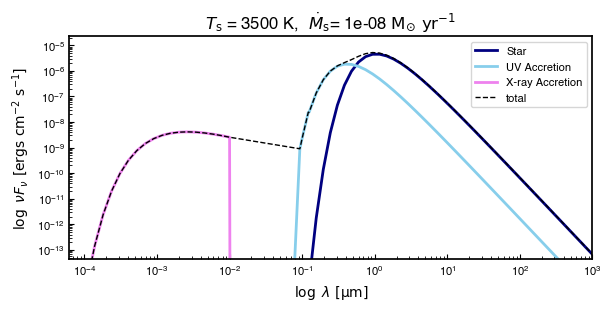

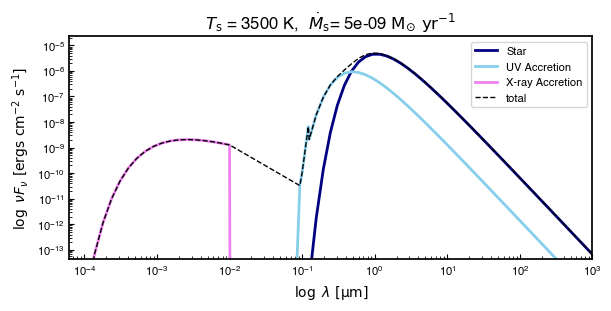

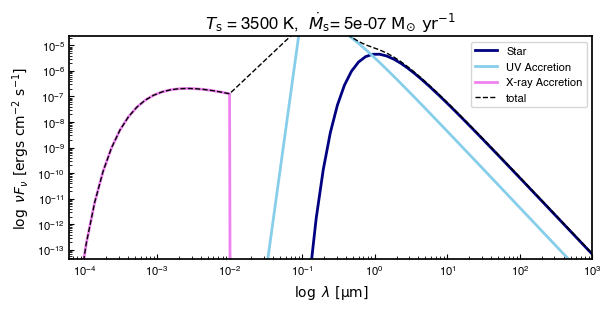

In [440]:
wedge.plot_flux_components(fid_Macc_reg_m)
wedge.plot_flux_components(fid_Macc_low_m)
wedge.plot_flux_components(fid_Macc_high_m)

In [442]:
#Temperature Components
fid_Macc_reg_Tcomponents = np.array(fid_Macc_reg_m.T['dust'])
fid_Macc_low_Tcomponents = np.array(fid_Macc_low_m.T['dust'])
fid_Macc_high_Tcomponents = np.array(fid_Macc_high_m.T['dust'])

#Gas components
fid_Macc_reg_rho_gas_components = np.array(fid_Macc_reg_m.rho['gas'])
fid_Macc_low_rho_gas_components = np.array(fid_Macc_low_m.rho['gas'])
fid_Macc_high_rho_gas_components = np.array(fid_Macc_high_m.rho['gas'])

#### Mdisk

In [ ]:

Mdisk = [5e-5, 4e-3, 5e-1]

fid_Macc_reg_out = 'out/fid_Macc_Reg/'
fid_Macc_reg_params = wedge.new_model('classII_disk_fid')
fid_Macc_reg_params['accrate'] = Macc_[1]
fid_Macc_reg_m = wedge.initialize_model(fid_Macc_reg_params, fid_Macc_reg_out)

fid_Macc_low_out = 'out/fid_Macc_Low/'
fid_Macc_low_params = wedge.new_model('classII_disk_fid')
fid_Macc_low_params['accrate'] = Macc_[0]
fid_Macc_low_m = wedge.initialize_model(fid_Macc_low_params, fid_Macc_low_out)

fid_Macc_high_out = 'out/fid_Macc_High/'
fid_Macc_high_params = wedge.new_model('classII_disk_fid')
fid_Macc_high_params['accrate'] = Macc_[2]
fid_Macc_high_m = wedge.initialize_model(fid_Macc_high_params, fid_Macc_high_out)

## UGU-LY 2D - HISTS

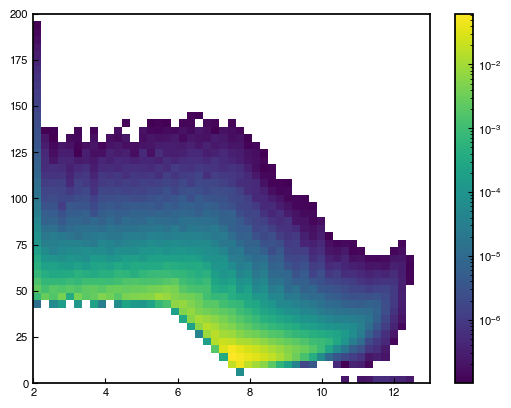

In [87]:
datay_1_1 = fid_T1_Macc1_Tcomponents.ravel()
datax_1_1 = np.log10(fid_T1_Macc1_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T1_Macc1_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_1_1 = ax.hist2d(datax_1_1,datay_1_1,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_1_1[3], ax=ax)
plt.show()

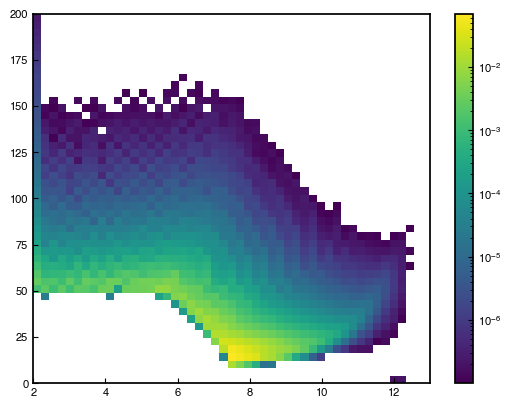

In [165]:
datay_2_1 = fid_T2_Macc1_Tcomponents.ravel()
datax_2_1 = np.log10(fid_T2_Macc1_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T2_Macc1_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_2_1 = ax.hist2d(datax_2_1,datay_2_1,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_2_1[3], ax=ax)
plt.show()

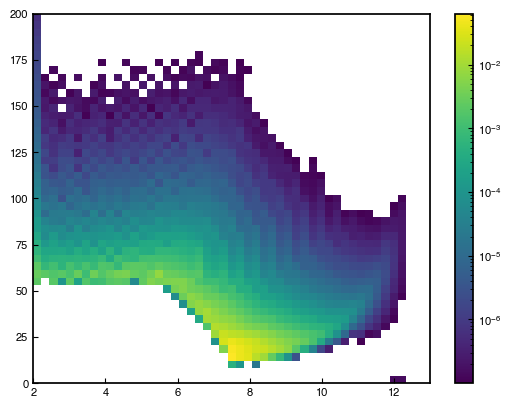

In [169]:
datay_3_1 = fid_T3_Macc1_Tcomponents.ravel()
datax_3_1 = np.log10(fid_T3_Macc1_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T3_Macc1_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_3_1 = ax.hist2d(datax_3_1,datay_3_1,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_3_1[3], ax=ax)
plt.show()

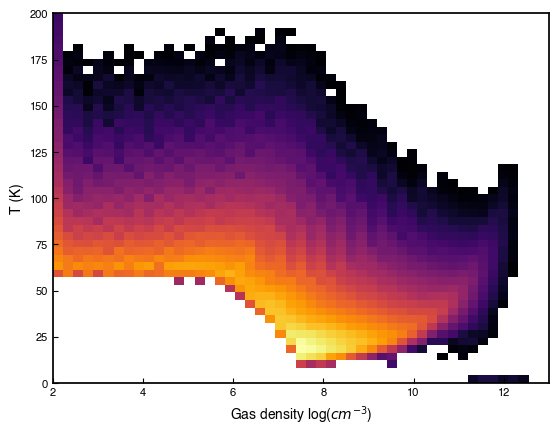

In [177]:
datay_4_1 = fid_T4_Macc1_Tcomponents.ravel()
datax_4_1 = np.log10(fid_T4_Macc1_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T4_Macc1_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)
cmap=plt.cm.inferno
nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_4_1, hist_4_1_xbins, hist_4_1_ybins, im = ax.hist2d(datax_4_1,datay_4_1,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1, cmap=cmap)
plt.xlabel("Gas density log($cm^{-3}$)")
plt.ylabel('T (K)')
# plt.colorbar(hist_4_1[3], ax=ax)
plt.show()

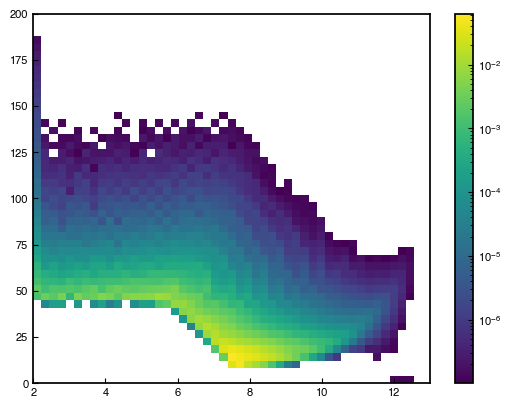

In [173]:
datay_1_2 = fid_T1_Macc2_Tcomponents.ravel()
datax_1_2 = np.log10(fid_T1_Macc2_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T1_Macc2_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_1_2 = ax.hist2d(datax_1_2,datay_1_2,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_1_2[3], ax=ax)
plt.show()

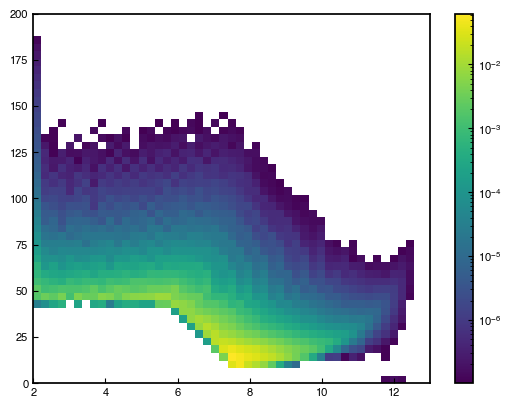

In [175]:
datay_1_3 = fid_T1_Macc3_Tcomponents.ravel()
datax_1_3 = np.log10(fid_T1_Macc3_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T1_Macc3_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_1_3 = ax.hist2d(datax_1_3,datay_1_3,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_1_3[3], ax=ax)
plt.show()

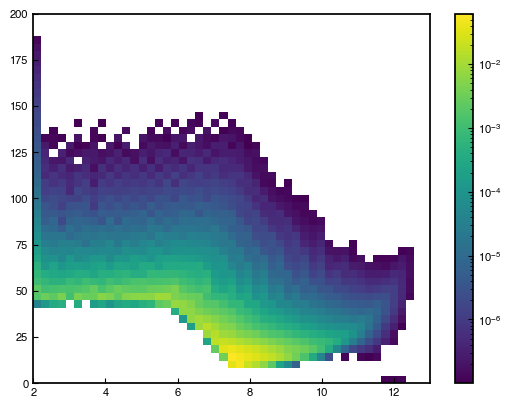

In [177]:
datay_1_4 = fid_T1_Macc4_Tcomponents.ravel()
datax_1_4 = np.log10(fid_T1_Macc4_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T1_Macc4_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_1_4 = ax.hist2d(datax_1_4,datay_1_4,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_1_4[3], ax=ax)
plt.show()

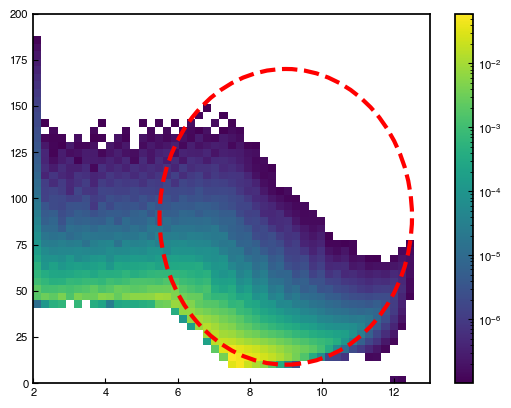

In [179]:
datay_1_5 = fid_T1_Macc5_Tcomponents.ravel()
datax_1_5 = np.log10(fid_T1_Macc5_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T1_Macc5_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_1_5 = ax.hist2d(datax_1_5,datay_1_5,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
ellipse=patches.Ellipse((9,90), 7, 160, linestyle='--', fill=False, ec='red', linewidth=3)
ax.add_patch(ellipse)
plt.colorbar(hist_1_5[3], ax=ax)
plt.show()

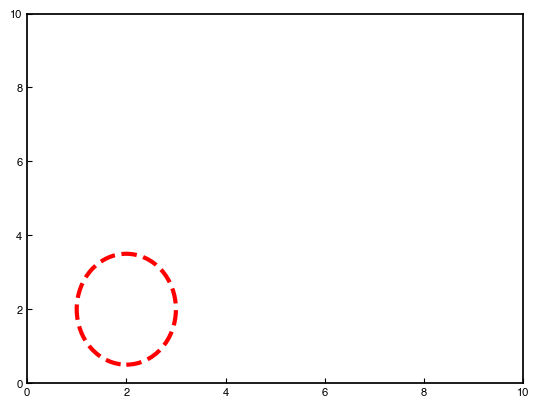

In [119]:
f,ax = subplots(1)
ellipse=patches.Ellipse((2,2), 2, 3, linestyle='--', fill=False, ec='red', linewidth=3)
ax.add_patch(ellipse)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
plt.show()

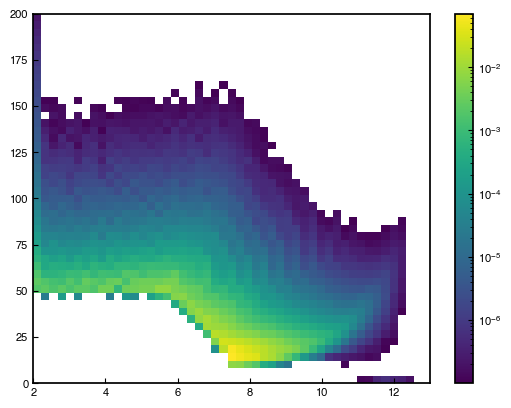

In [27]:
datay_2_2 = fid_T2_Macc2_Tcomponents.ravel()
datax_2_2 = np.log10(fid_T2_Macc2_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T2_Macc2_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_2_2 = ax.hist2d(datax_2_2,datay_2_2,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_2_2[3], ax=ax)
plt.show()

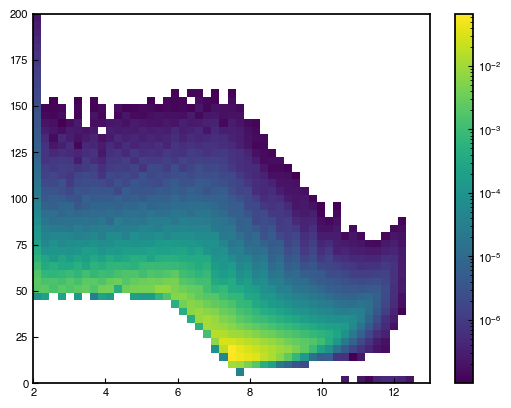

In [29]:
datay_2_3 = fid_T2_Macc3_Tcomponents.ravel()
datax_2_3 = np.log10(fid_T2_Macc3_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T2_Macc3_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_2_3 = ax.hist2d(datax_2_3,datay_2_3,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_2_3[3], ax=ax)
plt.show()

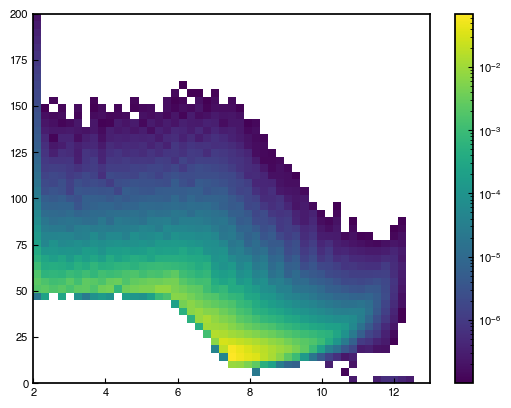

In [31]:
datay_2_4 = fid_T2_Macc4_Tcomponents.ravel()
datax_2_4 = np.log10(fid_T2_Macc4_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T2_Macc4_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_2_4 = ax.hist2d(datax_2_4,datay_2_4,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_2_4[3], ax=ax)
plt.show()

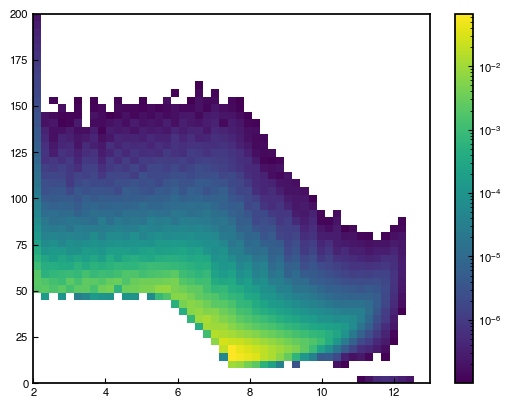

In [33]:
datay_2_5 = fid_T2_Macc5_Tcomponents.ravel()
datax_2_5 = np.log10(fid_T2_Macc5_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T2_Macc5_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_2_5 = ax.hist2d(datax_2_5,datay_2_5,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_2_5[3], ax=ax)
plt.show()

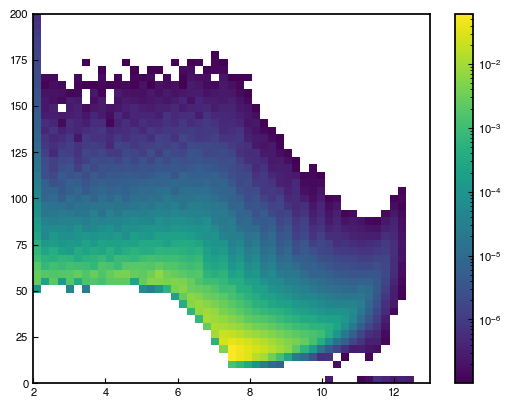

In [35]:
datay_3_2 = fid_T3_Macc2_Tcomponents.ravel()
datax_3_2 = np.log10(fid_T3_Macc2_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T3_Macc2_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_3_2 = ax.hist2d(datax_3_2,datay_3_2,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_3_2[3], ax=ax)
plt.show()

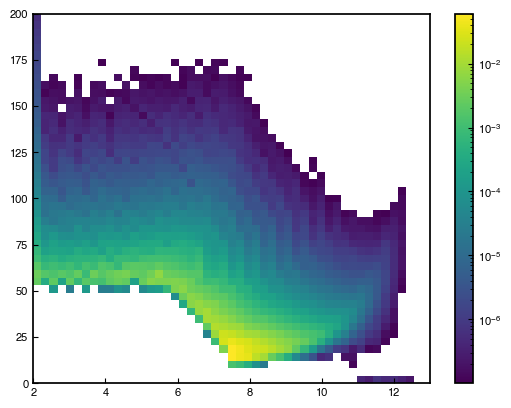

In [37]:
datay_3_3 = fid_T3_Macc3_Tcomponents.ravel()
datax_3_3 = np.log10(fid_T3_Macc3_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T3_Macc3_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_3_3 = ax.hist2d(datax_3_3,datay_3_3,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_3_3[3], ax=ax)
plt.show()

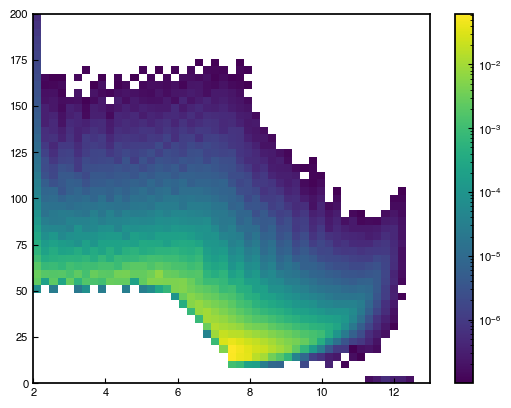

In [39]:
datay_3_4 = fid_T3_Macc4_Tcomponents.ravel()
datax_3_4 = np.log10(fid_T3_Macc4_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T3_Macc4_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_3_4 = ax.hist2d(datax_3_4,datay_3_4,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_3_4[3], ax=ax)
plt.show()

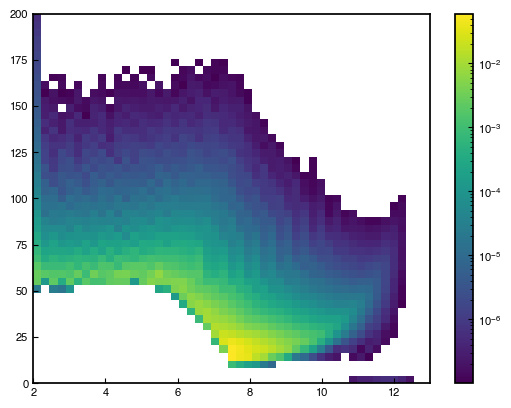

In [41]:
datay_3_5 = fid_T3_Macc5_Tcomponents.ravel()
datax_3_5 = np.log10(fid_T3_Macc5_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T3_Macc5_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_3_5 = ax.hist2d(datax_3_5,datay_3_5,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_3_5[3], ax=ax)
plt.show()

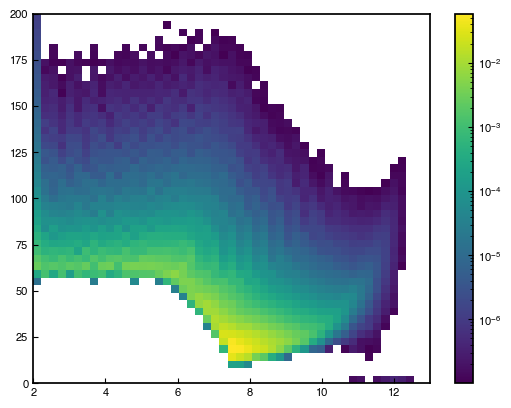

In [43]:
datay_4_2 = fid_T4_Macc2_Tcomponents.ravel()
datax_4_2 = np.log10(fid_T4_Macc2_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T4_Macc2_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_4_2 = ax.hist2d(datax_4_2,datay_4_2,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_4_2[3], ax=ax)
plt.show()

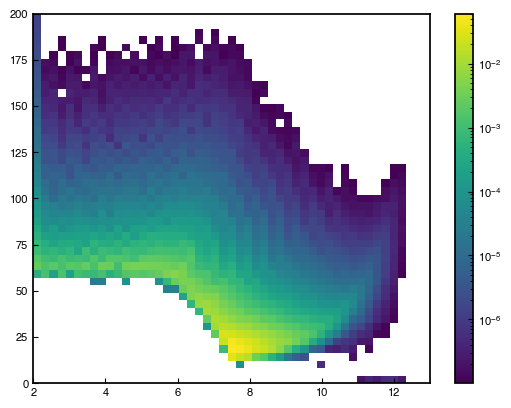

In [45]:
datay_4_3 = fid_T4_Macc3_Tcomponents.ravel()
datax_4_3 = np.log10(fid_T4_Macc3_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T4_Macc3_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_4_3 = ax.hist2d(datax_4_3,datay_4_3,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_4_3[3], ax=ax)
plt.show()

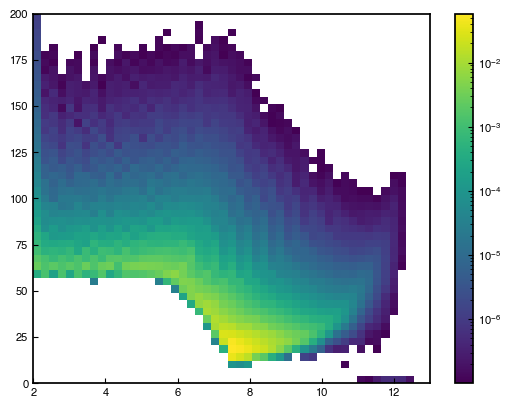

In [47]:
datay_4_4 = fid_T4_Macc4_Tcomponents.ravel()
datax_4_4 = np.log10(fid_T4_Macc4_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T4_Macc4_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_4_4 = ax.hist2d(datax_4_4,datay_4_4,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_4_4[3], ax=ax)
plt.show()

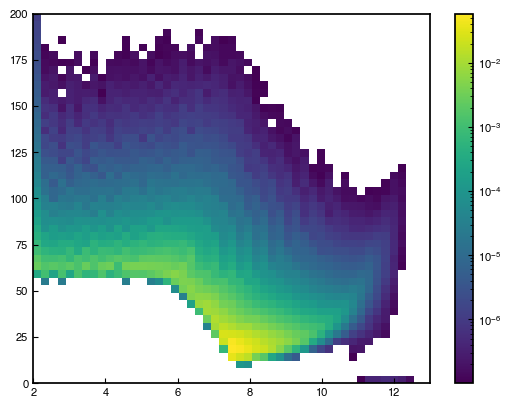

In [49]:
datay_4_5 = fid_T4_Macc5_Tcomponents.ravel()
datax_4_5 = np.log10(fid_T4_Macc5_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T4_Macc5_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_4_5 = ax.hist2d(datax_4_5,datay_4_5,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_4_5[3], ax=ax)
plt.show()

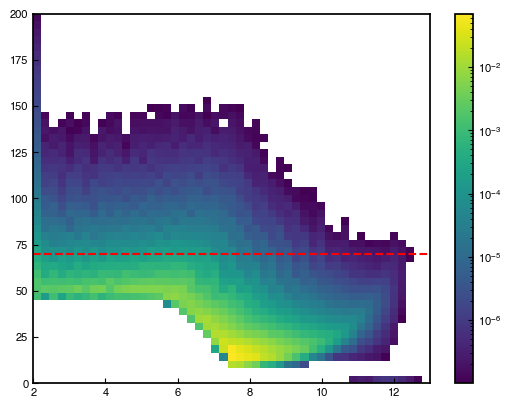

In [153]:
datay_TLR = fid_TLR_Tcomponents.ravel()
datax_TLR = np.log10(fid_TLR_rho_gas_components.ravel()/1.67e-24)
w_TLR = fid_TLR_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_TLR = ax.hist2d(datax_TLR,datay_TLR,bins=nbinsxy, norm=LogNorm(),weights=w_TLR, density=True, cmin=1e-7,cmax=1)
plt.axhline(y=70, linestyle='--',color='r')
plt.colorbar(hist_TLR[3], ax=ax)
plt.show()

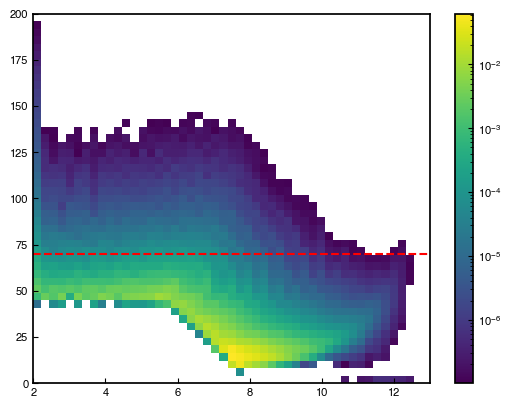

In [139]:
datay_1_1 = fid_T1_Macc1_Tcomponents.ravel()
datax_1_1 = np.log10(fid_T1_Macc1_rho_gas_components.ravel()/1.67e-24)
w1 = fid_T1_Macc1_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_1_1 = ax.hist2d(datax_1_1,datay_1_1,bins=nbinsxy, norm=LogNorm(),weights=w1, density=True, cmin=1e-7,cmax=1)
plt.axhline(y=70, linestyle='--',color='r')
plt.colorbar(hist_1_1[3], ax=ax)
plt.show()

In [ ]:
##### Working on making this less clunky #####



##STEP 1: Initialize Model and Change Rstar if needed

Lstar_cgs = 1.7*Lsun_cgs

fid_TLR_out = 'out/fid_test_TLR/'
fid_TLR_params = wedge.new_model('fiducial_T1_Macc1')

T = fid_TLR_params['Ts']
T4 = T**4
Lstar_cgs = 1.7*Lsun_cgs
denom = 4*math.pi*sigB*T4
Rstar_ = (np.sqrt(Lstar_cgs/denom))/Rsun
fid_TLR_params['Rs'] = Rstar_

fid_TLR_m = wedge.initialize_model(fid_TLR_params, fid_TLR_out)
##


Temps = []
Maccs = []
fid_models = []
Radii = []
model_out = []

for Ts, Macc, Rs, m_out in zip(Temps, Maccs, Radii, model_out):
    Ts = 


In [205]:
binned_statistic_2d(datax_4_1,datay_4_1,None,'count',bins=nbinsxy)

BinnedStatistic2dResult(statistic=array([[  0.,   0.,   0., ..., 934., 991., 975.],
       [  0.,   0.,   0., ...,  32.,  25.,  28.],
       [  0.,   0.,   0., ...,  28.,  25.,  25.],
       ...,
       [313.,   0.,   0., ...,  65.,  54.,  45.],
       [128.,   0.,   0., ...,  83.,  97.,  91.],
       [  5.,   0.,   0., ...,  30.,  34.,  36.]]), x_edge=array([ 2.        ,  2.2244898 ,  2.44897959,  2.67346939,  2.89795918,
        3.12244898,  3.34693878,  3.57142857,  3.79591837,  4.02040816,
        4.24489796,  4.46938776,  4.69387755,  4.91836735,  5.14285714,
        5.36734694,  5.59183673,  5.81632653,  6.04081633,  6.26530612,
        6.48979592,  6.71428571,  6.93877551,  7.16326531,  7.3877551 ,
        7.6122449 ,  7.83673469,  8.06122449,  8.28571429,  8.51020408,
        8.73469388,  8.95918367,  9.18367347,  9.40816327,  9.63265306,
        9.85714286, 10.08163265, 10.30612245, 10.53061224, 10.75510204,
       10.97959184, 11.20408163, 11.42857143, 11.65306122, 11.8775510

In [157]:
np.max(datax_TLR)

13.071302645479435

## Pretty Ones - (edit: nvm)

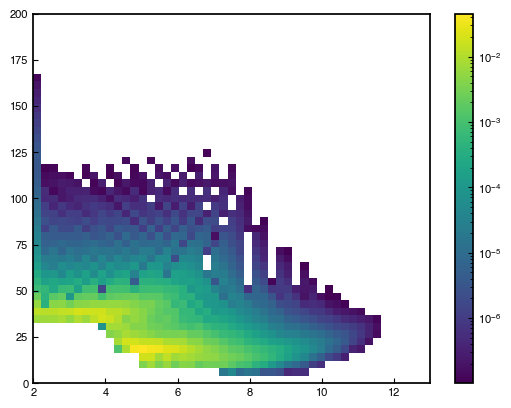

In [62]:
datay_Teff_reg = fid_Teff_reg_Tcomponents.ravel()
datax_Teff_reg = np.log10(fid_Teff_reg_rho_gas_components.ravel()/1.67e-24)
w_Teff_reg = fid_Teff_reg_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_Teff_reg = ax.hist2d(datax_Teff_reg,datay_Teff_reg,bins=nbinsxy, norm=LogNorm(),weights=w_Teff_reg, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_Teff_reg[3], ax=ax)
plt.show()

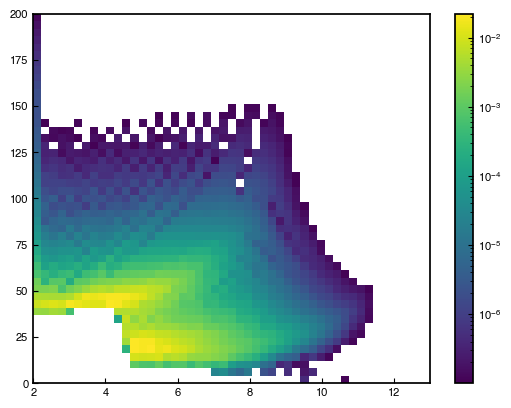

In [101]:
datay_Teff_low = fid_Teff_low_Tcomponents.ravel()
datax_Teff_low = np.log10(fid_Teff_low_rho_gas_components.ravel()/1.67e-24)
w_Teff_low = fid_Teff_low_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_Teff_low = ax.hist2d(datax_Teff_low,datay_Teff_low,bins=nbinsxy, norm=LogNorm(),weights=w_Teff_low, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_Teff_low[3], ax=ax)
plt.show()

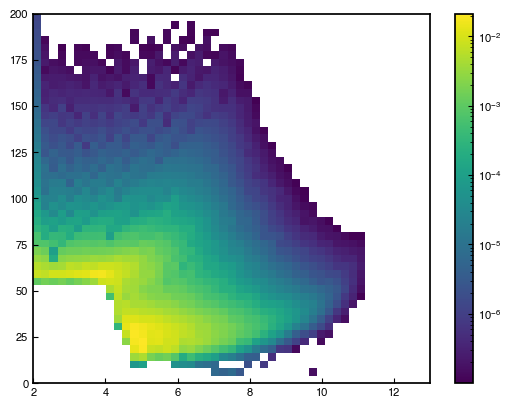

In [125]:
datay_Teff_high = fid_Teff_high_Tcomponents.ravel()
datax_Teff_high = np.log10(fid_Teff_high_rho_gas_components.ravel()/1.67e-24)
w_Teff_high = fid_Teff_high_m.m.dvol().swapaxes(0,1).ravel()
f, ax = plt.subplots(1)

nbinsy=np.linspace(0,200,50)
nbinsx=np.linspace(2,13,50)
nbinsxy = [nbinsx,nbinsy]
hist_Teff_high = ax.hist2d(datax_Teff_high,datay_Teff_high,bins=nbinsxy, norm=LogNorm(),weights=w_Teff_low, density=True, cmin=1e-7,cmax=1)
plt.colorbar(hist_Teff_high[3], ax=ax)
plt.show()

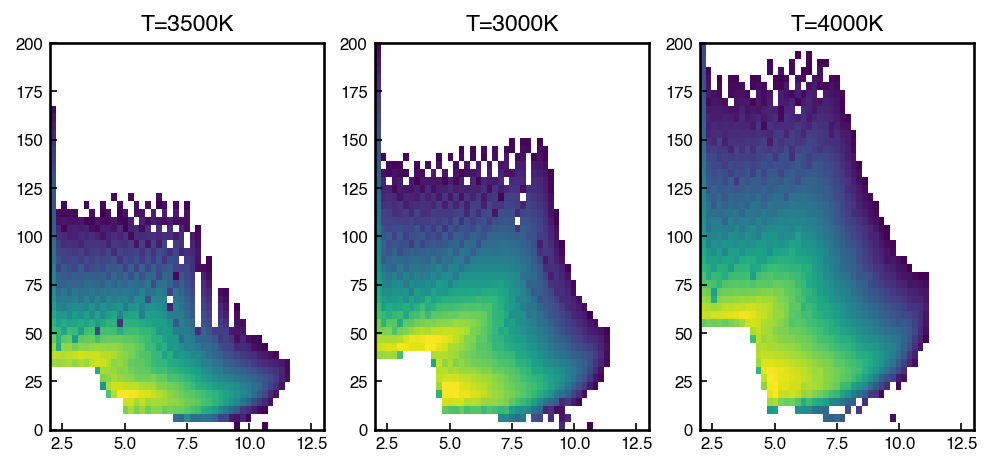

In [578]:
f,ax = plt.subplots(1,3, constrained_layout=True, dpi=150)
f.set_size_inches(6.5,3)


datay_Teff_reg = fid_Teff_reg_Tcomponents.ravel()
datax_Teff_reg = np.log10(fid_Teff_reg_rho_gas_components.ravel()/1.67e-24)
datay_Teff_low = fid_Teff_low_Tcomponents.ravel()
datax_Teff_low = np.log10(fid_Teff_low_rho_gas_components.ravel()/1.67e-24)
datay_Teff_high = fid_Teff_high_Tcomponents.ravel()
datax_Teff_high = np.log10(fid_Teff_high_rho_gas_components.ravel()/1.67e-24)

w_Teff_reg = fid_Teff_reg_m.m.dvol().swapaxes(0,1).ravel()
w_Teff_low = fid_Teff_low_m.m.dvol().swapaxes(0,1).ravel()
w_Teff_high = fid_Teff_high_m.m.dvol().swapaxes(0,1).ravel()

nbinsy_reg =np.linspace(0,200,50)
nbinsx_reg =np.linspace(2,13,50)
nbinsy_low =np.linspace(0,200,50)
nbinsx_low =np.linspace(2,13,50)
nbinsy_high =np.linspace(0,200,50)
nbinsx_high =np.linspace(2,13,50)

bins_toplot_reg = [nbinsx_reg,nbinsy_reg]
bins_toplot_low = [nbinsx_low,nbinsy_low]
bins_toplot_high = [nbinsx_high,nbinsy_high]

bins_toplot = [bins_toplot_reg, bins_toplot_low, bins_toplot_high]

w_toplot = [w_Teff_reg, w_Teff_low, w_Teff_high]
datax_toplot = [datax_Teff_reg, datax_Teff_low, datax_Teff_high]
datay_toplot = [datay_Teff_reg, datay_Teff_low, datay_Teff_high]
# ylabels = 'Temp'

title_toplot = [r"T=3500K",r'T=3000K',r'T=4000K']
for a,datax,datay,bins,weight,title in zip(ax,datax_toplot,datay_toplot,bins_toplot,w_toplot,title_toplot):
    #data_filtered = data[data!=-99]
    a.hist2d(datax,datay,bins=bins, norm=LogNorm(),weights=weight, density=True,cmin=1e-7,cmax=1)
    a.set_title(title)
    # f.xlabel(xlabels)
    # f.ylabel(ylabels)

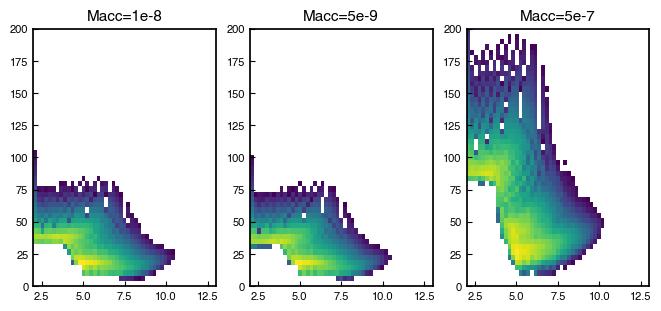

In [582]:
f,ax = plt.subplots(1,3, constrained_layout=True)
f.set_size_inches(6.5,3)


datay_Macc_reg = fid_Macc_reg_Tcomponents.ravel()
datax_Macc_reg = np.log10(fid_Macc_reg_rho_gas_components.ravel()/1.67e-24)
datay_Macc_low = fid_Macc_low_Tcomponents.ravel()
datax_Macc_low = np.log10(fid_Macc_low_rho_gas_components.ravel()/1.67e-24)
datay_Macc_high = fid_Macc_high_Tcomponents.ravel()
datax_Macc_high = np.log10(fid_Macc_high_rho_gas_components.ravel()/1.67e-24)

w_Macc_reg = fid_Macc_reg_m.m.dvol().swapaxes(0,1).ravel()
w_Macc_low = fid_Macc_low_m.m.dvol().swapaxes(0,1).ravel()
w_Macc_high = fid_Macc_high_m.m.dvol().swapaxes(0,1).ravel()

nbinsy_reg =np.linspace(0,200,50)
nbinsx_reg =np.linspace(2,13,50)
nbinsy_low =np.linspace(0,200,50)
nbinsx_low =np.linspace(2,13,50)
nbinsy_high =np.linspace(0,200,50)
nbinsx_high =np.linspace(2,13,50)

bins_toplot_Macc_reg = [nbinsx_reg,nbinsy_reg]
bins_toplot_Macc_low = [nbinsx_low,nbinsy_low]
bins_toplot_Macc_high = [nbinsx_high,nbinsy_high]

bins_toplot_Macc = [bins_toplot_Macc_reg, bins_toplot_Macc_low, bins_toplot_Macc_high]

w_toplot = [w_Macc_reg, w_Macc_low, w_Macc_high]
datax_toplot_Macc = [datax_Macc_reg, datax_Macc_low, datax_Macc_high]
datay_toplot_Macc = [datay_Macc_reg, datay_Macc_low, datay_Macc_high]
# xlabels = 'Rho'
# ylabels = 'Temp'

title_toplot = [r"Macc=1e-8",r'Macc=5e-9',r'Macc=5e-7']
for a,datax_Macc,datay_Macc,bins,weight,title in zip(ax,datax_toplot_Macc,datay_toplot_Macc,bins_toplot_Macc,w_toplot,title_toplot):
    #data_filtered = data[data!=-99]
    a.hist2d(datax_Macc,datay_Macc,bins=bins, norm=LogNorm(),weights=weight, density=True,cmin=5e-6,cmax=1)
    a.set_title(title)
    # f.xlabel(xlabels)
    # f.ylabel(ylabels)

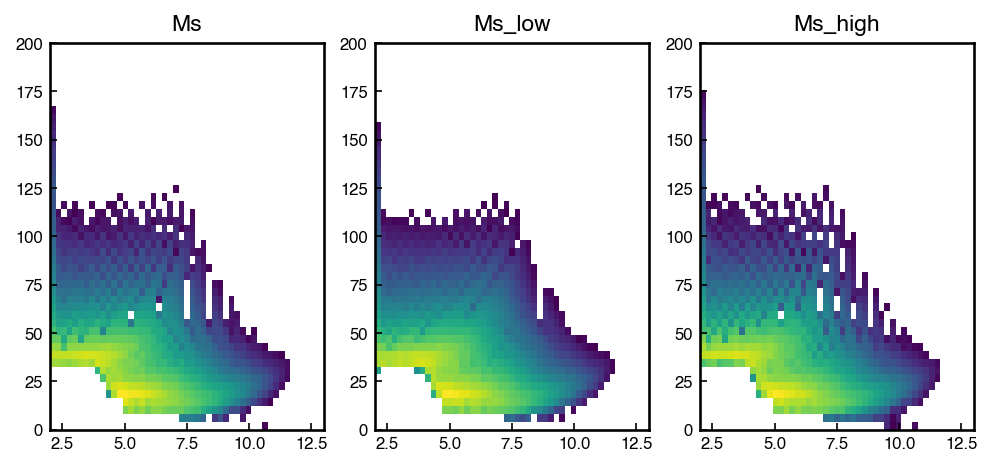

In [448]:
f,ax = plt.subplots(1,3, constrained_layout=True, dpi=150)
f.set_size_inches(6.5,3)


datay_Ms_reg = fid_Ms_reg_Tcomponents.ravel()
datax_Ms_reg = np.log10(fid_Ms_reg_rho_gas_components.ravel()/1.67e-24)
datay_Ms_low = fid_Ms_low_Tcomponents.ravel()
datax_Ms_low = np.log10(fid_Ms_low_rho_gas_components.ravel()/1.67e-24)
datay_Ms_high = fid_Ms_high_Tcomponents.ravel()
datax_Ms_high = np.log10(fid_Ms_high_rho_gas_components.ravel()/1.67e-24)

w_Ms_reg = fid_Ms_reg_m.m.dvol().swapaxes(0,1).ravel()
w_Ms_low = fid_Ms_low_m.m.dvol().swapaxes(0,1).ravel()
w_Ms_high = fid_Ms_high_m.m.dvol().swapaxes(0,1).ravel()

nbinsy_reg =np.linspace(0,200,50)
nbinsx_reg =np.linspace(2,13,50)
nbinsy_low =np.linspace(0,200,50)
nbinsx_low =np.linspace(2,13,50)
nbinsy_high =np.linspace(0,200,50)
nbinsx_high =np.linspace(2,13,50)

bins_toplot_Ms_reg = [nbinsx_reg,nbinsy_reg]
bins_toplot_Ms_low = [nbinsx_low,nbinsy_low]
bins_toplot_Ms_high = [nbinsx_high,nbinsy_high]

bins_toplot = [bins_toplot_reg, bins_toplot_low, bins_toplot_high]

w_toplot = [w_Ms_reg, w_Ms_low, w_Ms_high]
datax_toplot_Ms = [datax_Ms_reg, datax_Ms_low, datax_Ms_high]
datay_toplot_Ms = [datay_Ms_reg, datay_Ms_low, datay_Ms_high]
# xlabels = 'Rho'
# ylabels = 'Temp'

title_toplot = [r"Ms",r'Ms_low',r'Ms_high']
for a,datax_Ms,datay_Ms,bins,weight,title in zip(ax,datax_toplot_Ms,datay_toplot_Ms,bins_toplot,w_toplot,title_toplot):
    #data_filtered = data[data!=-99]
    a.hist2d(datax_Ms,datay_Ms,bins=bins, norm=LogNorm(),weights=weight, density=True,cmin=1e-7,cmax=1)
    a.set_title(title)
    # f.xlabel(xlabels)
    # f.ylabel(ylabels)